In [2]:
import yfinance as yf
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

Earlist start date: 1927-12-30

In [3]:
today = datetime.date.today().strftime('%Y-%m-%d')
spx = yf.Ticker("^SPX").history(start="1900-01-01", end=today)

In [4]:
spx.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-02 00:00:00-04:00,6193.879883,6227.600098,6188.290039,6227.419922,5645710000,0.0,0.0
2025-07-03 00:00:00-04:00,6246.459961,6284.649902,6246.459961,6279.350098,3378110000,0.0,0.0
2025-07-07 00:00:00-04:00,6259.040039,6262.069824,6201.000000,6229.979980,5236740000,0.0,0.0
2025-07-08 00:00:00-04:00,6234.029785,6242.700195,6217.750000,6225.520020,5739030000,0.0,0.0
2025-07-09 00:00:00-04:00,6243.330078,6269.160156,6231.430176,6263.259766,4813340000,0.0,0.0


In [5]:
spx.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [6]:
spx = spx.reset_index()

spx = spx[["Date", "Close"]].copy()
spx.columns = [col.lower() for col in spx.columns]

In [7]:
spx['year'] = spx['date'].dt.year
spx_annual = spx.groupby('year')['close'].last() #Take last entry

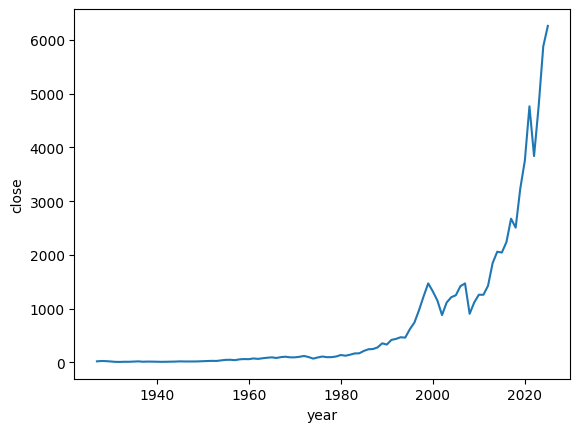

In [8]:
_ = sns.lineplot(x=spx_annual.index, y=spx_annual)

In [9]:
spx["month_year"] = spx['date'].dt.to_period('M')
spx_monthly = spx.groupby('month_year')["close"].last()

C:\Users\ivan\AppData\Local\Temp\ipykernel_7936\213610932.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  spx["month_year"] = spx['date'].dt.to_period('M')


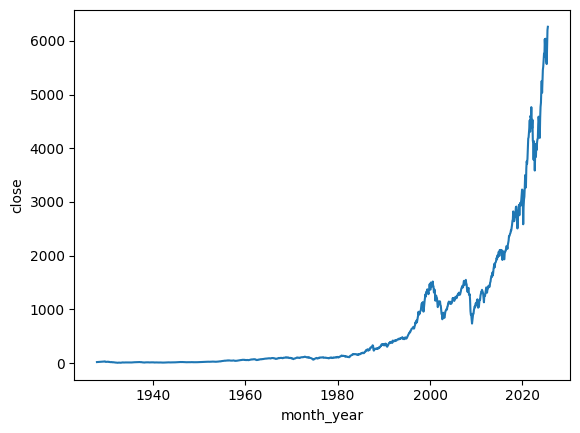

In [10]:
_ = sns.lineplot(x=spx_monthly.index.to_timestamp(), y=spx_monthly)

In [11]:
spx["week_year"] = spx['date'].dt.to_period('W')
spx_weekly = spx.groupby('week_year')["close"].last()

C:\Users\ivan\AppData\Local\Temp\ipykernel_7936\2000474493.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  spx["week_year"] = spx['date'].dt.to_period('W')


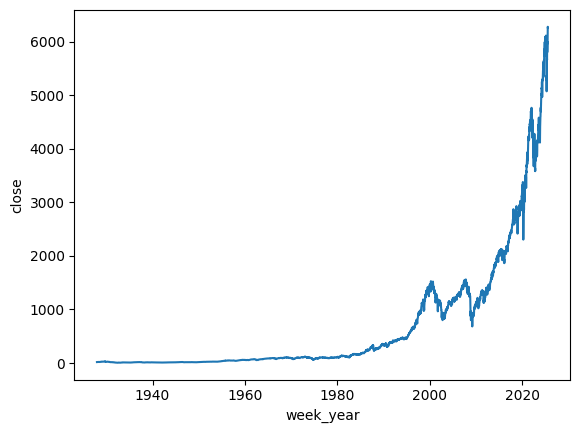

In [12]:
_ = sns.lineplot(x=spx_weekly.index.to_timestamp(), y=spx_weekly)

In [13]:
spx_annual_returns = spx_annual.pct_change()

In [14]:
spx_annual_returns.tail()

year
2021    0.268927
2022   -0.194428
2023    0.242305
2024    0.233090
2025    0.064885
Name: close, dtype: float64

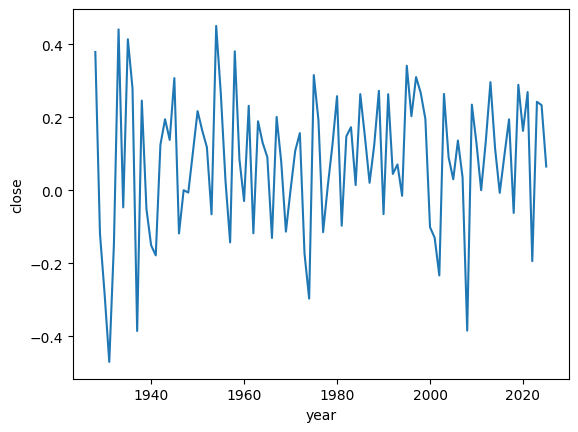

In [15]:
_ = sns.lineplot(x=spx_annual_returns.index, y=spx_annual_returns)

In [16]:
spx_annual_returns.describe()

count    98.000000
mean      0.079961
std       0.189409
min      -0.470665
25%      -0.050598
50%       0.110887
75%       0.227663
max       0.450222
Name: close, dtype: float64

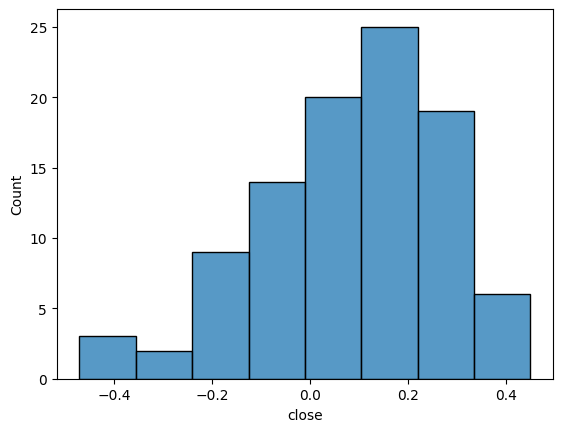

In [17]:
_ = sns.histplot(spx_annual_returns)

In [18]:
spx_monthly_returns = spx_monthly.pct_change()

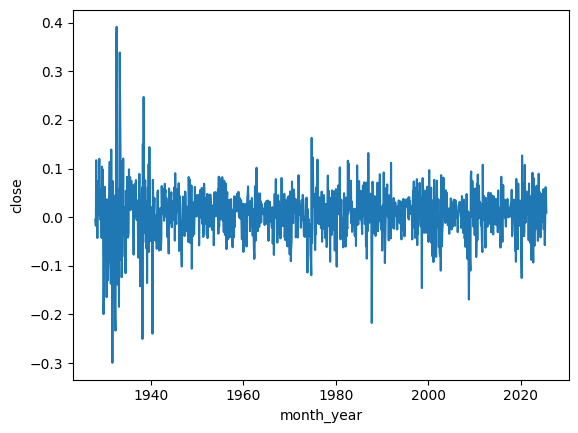

In [19]:
_ = sns.lineplot(x=spx_monthly_returns.index.to_timestamp(), y=spx_monthly_returns)

In [20]:
spx_monthly_returns.describe()

count    1171.000000
mean        0.006459
std         0.053450
min        -0.299423
25%        -0.019131
50%         0.009397
75%         0.035969
max         0.391376
Name: close, dtype: float64

In [21]:
spx_weekly_returns = spx_weekly.pct_change()

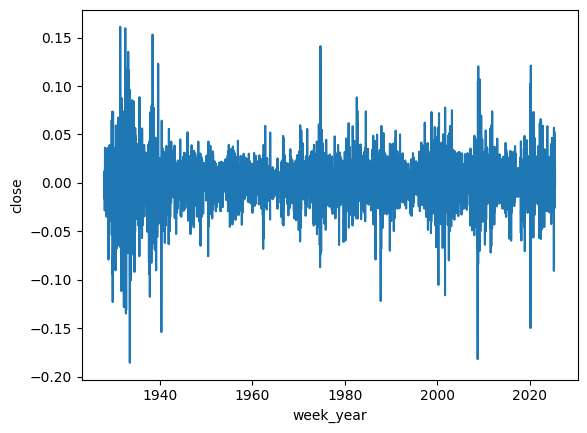

In [22]:
_ = sns.lineplot(x=spx_weekly_returns.index.to_timestamp(), y=spx_weekly_returns)

In [23]:
spx_weekly_returns.describe()

count    5088.000000
mean        0.001465
std         0.024831
min        -0.185654
25%        -0.010720
50%         0.003047
75%         0.014328
max         0.161120
Name: close, dtype: float64

In [26]:
spx.head()

,date,close,year,month_year,week_year
0,1927-12-30 00:00:00-05:00,17.660000,1927,1927-12,1927-12-26/1928-01-01
1,1928-01-03 00:00:00-05:00,17.760000,1928,1928-01,1928-01-02/1928-01-08
2,1928-01-04 00:00:00-05:00,17.719999,1928,1928-01,1928-01-02/1928-01-08
3,1928-01-05 00:00:00-05:00,17.549999,1928,1928-01,1928-01-02/1928-01-08
4,1928-01-06 00:00:00-05:00,17.660000,1928,1928-01,1928-01-02/1928-01-08


In [25]:
spx.to_csv("data/spx.csv")